## datatime native python library

In [1]:
from datetime import datetime

In [2]:
my_year = 2020
my_month = 9
my_day = 26
my_hour = 14
my_min = 13
my_sec = 15

In [3]:
my_date = datetime(my_year,my_month,my_day,my_hour, my_min, my_sec) #year,month,day - mandatory arguments

In [4]:
print(my_date)
print(type(my_date))
print(my_date.month)

2020-09-26 14:13:15
<class 'datetime.datetime'>
9


## datetime64 with numpy

In [5]:
import numpy as np
#default format YYYY-MM-DD

In [6]:
np.array(['2020-09-26','2020-10-26'], dtype='datetime64[D]') #Play with Y,M,D,h level precision - default is D

array(['2020-09-26', '2020-10-26'], dtype='datetime64[D]')

In [7]:
np.arange(0,10,1) # Array ranging from start , stop, stepsize

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
#Now with datetime
np.arange('2020-09-26','2020-10-26', 7, dtype='datetime64[D]') #Stepsize default is unit precision given

array(['2020-09-26', '2020-10-03', '2020-10-10', '2020-10-17',
       '2020-10-24'], dtype='datetime64[D]')

## datetime64 with pandas

In [9]:
import pandas as pd

In [10]:
pd.date_range('2020-09-26',periods=7, freq='D') 

DatetimeIndex(['2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01', '2020-10-02'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pd.date_range('Sep 26, 2020',periods=7, freq='D')
#Pandas by default understand various formats and string codes apart from YYYY-MM-DD

DatetimeIndex(['2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01', '2020-10-02'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.to_datetime(['9--15/2020','12--9/2020'], format='%m--%d/%Y')
#to_datetime method has lot of flexibility for formatting to customized dates

DatetimeIndex(['2020-09-15', '2020-12-09'], dtype='datetime64[ns]', freq=None)

## Pandas DateTime analysis

In [13]:
data = np.random.randn(3,2) 
#randn- return matrix of dim 3 * 2 with elements taken randomly from Standard Normal
#Distribution(mean 0, std = 1)
cols = ['A','B']
print(data)

[[-0.76229436  1.39057181]
 [-0.63010953 -0.16412637]
 [ 0.09803041 -0.26690544]]


In [14]:
#Creat datetime index
idx = pd.date_range('2020-09-26', periods=3,freq='D')
df = pd.DataFrame(data, index=idx,columns=cols)

In [15]:
df

,A,B
2020-09-26,-0.762294,1.390572
2020-09-27,-0.630110,-0.164126
2020-09-28,0.098030,-0.266905


In [16]:
print(df.index)
print(df.index.max())
print(df.index.argmax())
print(df.index.min())
print(df.index.argmin())

DatetimeIndex(['2020-09-26', '2020-09-27', '2020-09-28'], dtype='datetime64[ns]', freq='D')
2020-09-28 00:00:00
2
2020-09-26 00:00:00
0


## Time Resampling
Type of group by operation. Take daily data and resample to weekly or monthly or higher level data

In [17]:
df = pd.read_csv('Data/starbucks.csv',parse_dates=True,index_col='Date')
#Read the Date column as timestamp and set it as index

In [18]:
df.head(5)
#Stock price date for starbucks

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [19]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [20]:
df.resample(rule='A').mean() # daily ---> yearly. String code A meaning yearly(Annual). Rule of yearly and aggregate function of mean
#Aggregate functions - mean, min, max, sum

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [21]:
#Custom resampling function to take first day value for each year
def first_day(entry):
    if len(entry) != 0:
        return entry[0]

In [22]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


## Plot with resampling

In [23]:
from matplotlib import pyplot as plt
df['Close'].resample('A').mean().plot.bar()

<AxesSubplot:xlabel='Date'>

<AxesSubplot:title={'center':'Month Max Closing price'}, xlabel='Date'>

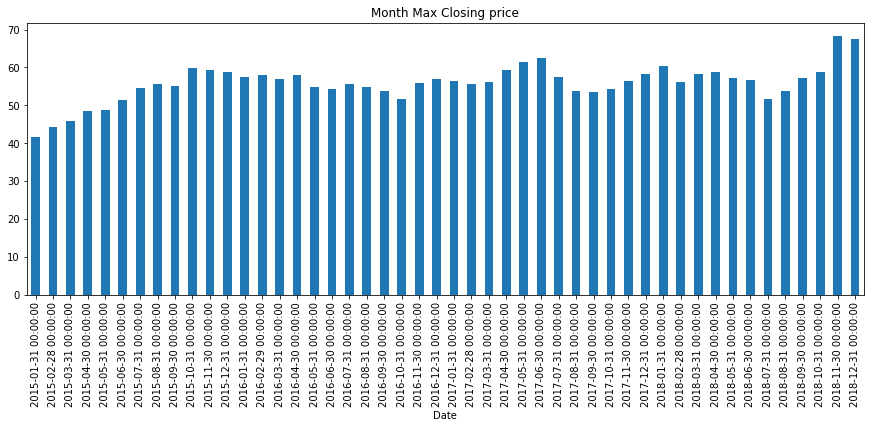

In [24]:
#Monthly mean
df['Close'].resample('M').max().plot.bar(figsize=(15,5), title='Month Max Closing price')

## Time Shifting with Pandas
Shifting data up or down with keeping the date index intact

In [25]:
df.head(3)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340


In [26]:
df.tail(3)

,Close,Volume
Date,,
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [27]:
df.shift(1).head(3)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0


In [28]:
df.shift(-1).tail(3)

,Close,Volume
Date,,
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [29]:
df.shift(periods=1,freq='D') #Shift the index keeping the data intact

,Close,Volume
Date,,
2015-01-03,38.0061,6906098
2015-01-06,37.2781,11623796
2015-01-07,36.9748,7664340
2015-01-08,37.8848,9732554
2015-01-09,38.4961,13170548
...,...,...
2018-12-25,60.5600,6323252
2018-12-27,63.0800,16646238
2018-12-28,63.2000,11308081


## Rolling and Expanding with Pandas Timeseries df

<AxesSubplot:xlabel='Date'>

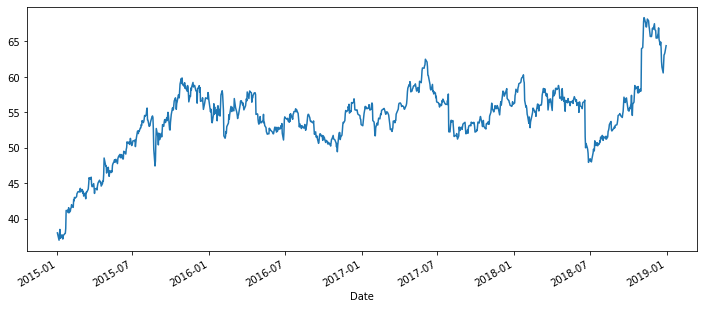

In [30]:
df = pd.read_csv('Data/starbucks.csv',index_col='Date', parse_dates=True)
df['Close'].plot(figsize=(12,5))

In [31]:
#use 7 days and use aggregate function of mean
df.rolling(window=7).mean().head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


<AxesSubplot:xlabel='Date'>

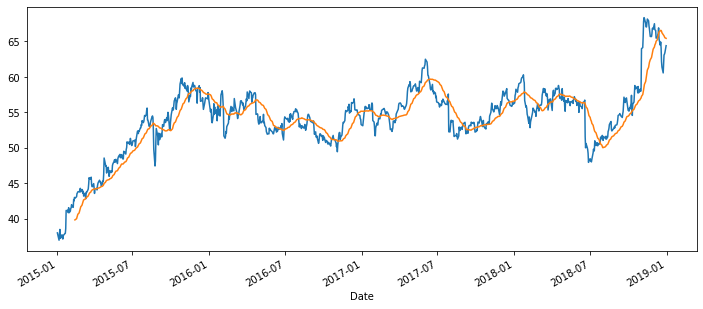

In [32]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

##Rolling Window

In [33]:
#Add legend alternative
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [34]:
df.head(3)

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN


<AxesSubplot:xlabel='Date'>

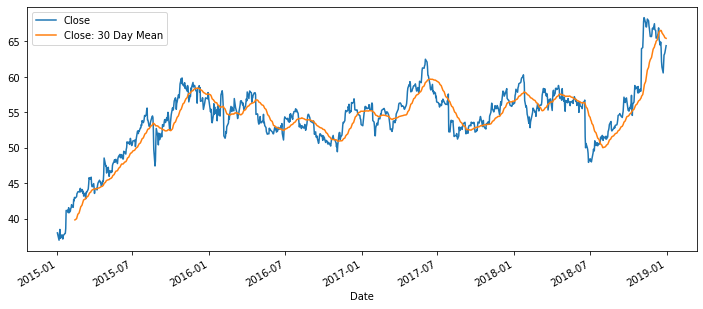

In [35]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5))

Expanding = Each data point will be average of all datapoints which came before it. So last point will be average of that column

<AxesSubplot:xlabel='Date'>

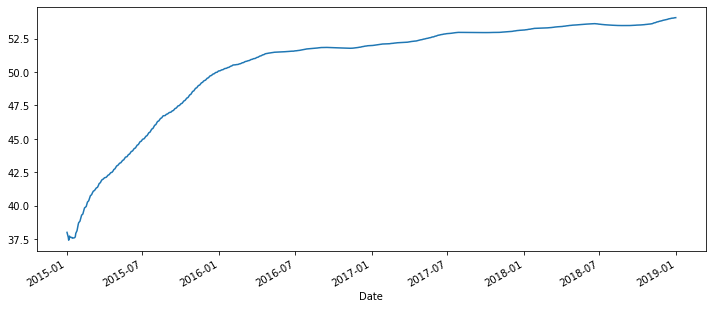

In [36]:
df['Close'].expanding().mean().plot(figsize=(12,5))

# Visualizing Time Series Data with pandas

In [37]:
df = pd.read_csv('Data/starbucks.csv', index_col='Date', parse_dates=True)

In [38]:
df.index = df.index.to_pydatetime()

<AxesSubplot:>

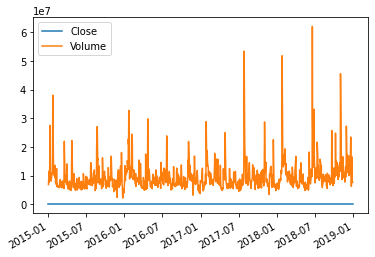

In [39]:
df.plot()

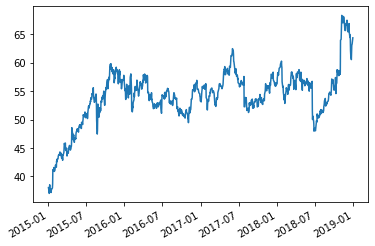

In [40]:
df['Close'].plot();

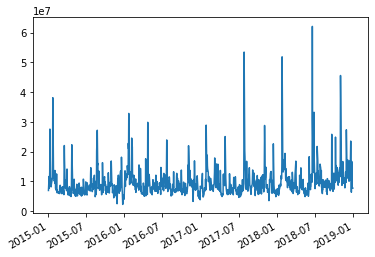

In [41]:
df['Volume'].plot();

In [43]:
title = 'Closing Price Plot'
ylabel = 'Price'
xlabel = 'Date'

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Price')]

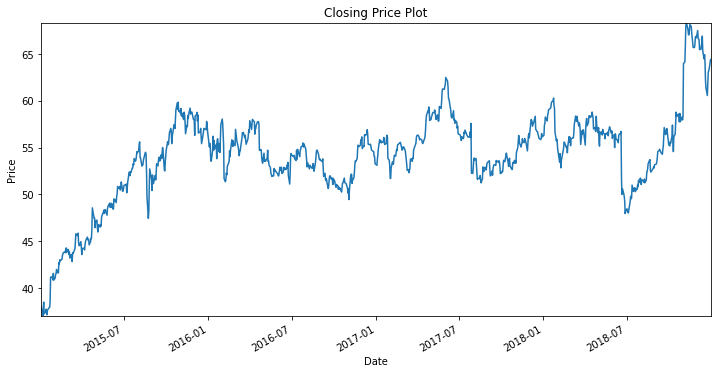

In [49]:
#to use labels, create ax-axis
ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='both',tight=True) #Remove extra spaces before or after
ax.set(xlabel=xlabel,ylabel=ylabel)

<AxesSubplot:>

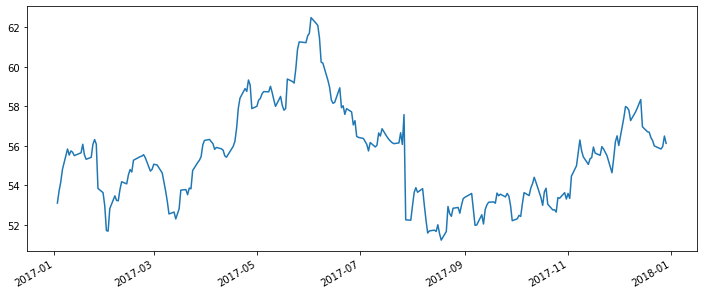

In [55]:
#Plot just 2017 data
#Option 1
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,5))

<AxesSubplot:>

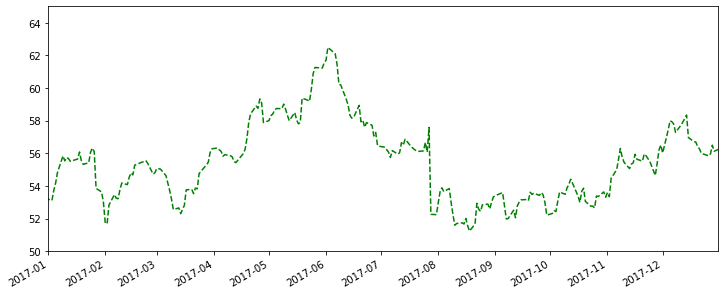

In [59]:
#Option 2
df['Close'].plot(figsize=(12,5),xlim=['2017-01-01','2017-12-31'],ylim=[50,65],ls='--',c='green')#ls-linestyle,c-color

In [60]:
#Setting Xticks Spacing by changing messy default and space out evenly
from matplotlib import dates

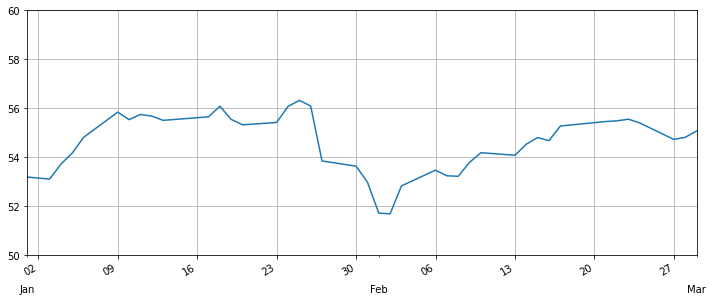

In [76]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60], figsize=(12,5))
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0)) #0-6 --Mon-Sum
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

#Minor Axis
ax.xaxis.set_minor_locator(dates.MonthLocator()) 
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

#GridLines
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [79]:
df.loc['2015-01-02']['Close']

38.0061